In [2]:
conda install -c conda-forge scikit-optimize

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.13.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/elzadgeorge/opt/anaconda3/envs/BMIF804

  added / updated specs:
    - scikit-optimize


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.5.7   |       h8857fd0_0         145 KB  conda-forge
    certifi-2023.5.7           |     pyhd8ed1ab_0         149 KB  conda-forge
    openssl-1.1.1t             |       hfd90126_0         1.7 MB  conda-forge
    pyaml-23.5.7               |     pyhd8ed1ab_0          21 KB  conda-forge
    scikit-optimize-0.9.0      |     pyhd8ed1ab_1          74 KB  conda-forge
    ------------------------------------------------------------
                                           Total:  

In [5]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

from pprint import pprint
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler, OneHotEncoder, OrdinalEncoder

from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.svm import SVC

In [7]:
data = pd.read_csv('/users/elzadgeorge/Documents/Speed-Dating/train.csv') # to read the training CSV file

data.shape # training data shape

(5909, 192)

In [14]:
pd.set_option('display.max_rows', None)#This is for showing all the info; otherwise Pandas truncates the outputs

In [15]:
data

gender  idg  condtn  wave  round  position  positin1  order  partner  \
0          0    3       2    14     18         2       2.0     14       12   
1          1   14       1     3     10         2       NaN      8        8   
2          1   14       1    13     10         8       8.0     10       10   
3          1   38       2     9     20        18      13.0      6        7   
4          1   24       2    14     20         6       6.0     20       17   
5          0    3       2    14     18         2       2.0     18        8   
6          1    6       2     9     20        17      16.0      2       11   
7          0    7       2     4     18        15       NaN      1        1   
8          0   29       2    11     21        10      10.0      3        6   
9          0    7       2    11     21        13      13.0     15       11   
10         0    3       2    12     14         5       5.0      7       13   
11         0   20       2    12     14         2       2.0      4       13   
12         0    5       2    21     22        15      15.0     17       21   
13         1    6       2    11     21         3       3.0     10       10   
14         0    3       1     6      5         3       3.0      5        6   
15         1   40       2    21     22        10      20.0     13        7   
16         1   12       2     9     20         5       2.0      4        3   
17         1   32       2    15     18        15       2.0     14       14   
18         0   11       2    21     22        16      16.0     10       19   
19         1   26       2     4     18        16       NaN     14        3   
20         0   29       2    11     21        10      10.0      5        7   
21         0   33       2     9     20         1       1.0     14       18   
22         0   39       2     9     20         8       8.0     18       20   
23         0    3       1     8     10        10      10.0     10        4   
24         0   15       2    11     21         1       1.0      8        3   
25         1    4       1     6      5         2       1.0      2        1   
26         0   15       2    15     19        14      14.0      8       12   
27         0    7       2    19     15         5       5.0     11       13   
28         0   23       2    19     15         4       4.0      9       11   
29         0   17       1    13      9         7       7.0      1        5   
30         0   19       2     9     20        11      11.0      7        1   
31         1   44       2    21     22        12      10.0      3        2   
32         0   15       2    11     21         1       1.0     20       18   
33         1    8       2    12     14        14      14.0      5        5   
34         1   32       2     2     19         9       NaN      5        9   
35         0   11       2     9     20        19      19.0     18        6   
36         0   15       2    21     22        18      18.0     15        9   
37         0   25       2     4     18         8       NaN      6       13   
38         0   13       2    11     21         5       5.0     13       14   
39         1   30       2    14     20        14      14.0     15        7   
40         0    7       1     1     10         6       NaN      8       10   
41         1   20       2    19     15         5       6.0     15        4   
42         0   13       1     3     10         3       NaN      2        5   
43         1   28       2    15     18        14      10.0      5        8   
44         0    7       2    14     18         9       9.0      6        1   
45         0    1       1     5     10         6       NaN      3        5   
46         1   10       2     9     20         9      19.0     11        8   
47         0   11       2    19     15        12      13.0      8       15   
48         1   36       2    15     18         2      12.0      9       11   
49         0   11       2     9     20        19      19.0     13        8   
50         1   14       1   

In [16]:
data.isnull().sum()# to get  number of missing values in each column

gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1318
order          0
partner        0
pid            8
match          0
int_corr     109
samerace       0
age_o         65
race_o        48
pf_o_att      59
pf_o_sin      59
pf_o_int      59
pf_o_fun      66
pf_o_amb      73
pf_o_sha      83
attr_o       153
sinc_o       209
intel_o      220
fun_o        265
amb_o        512
shar_o       787
like_o       183
prob_o       235
met_o        275
age           63
field         45
field_cd      59
undergra    2442
mn_sat      3674
tuition     3365
race          45
imprace       58
imprelig      58
from          58
zipcode      720
income      2862
goal          58
date          72
go_out        58
career        64
career_c     100
sports        58
tvsports      58
exercise      58
dining        58
museums       58
art           58
hiking        58
gaming        58
clubbing      58
reading       58
tv            58
theater       

In [17]:
data.info()# Information of the training dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Columns: 192 entries, gender to id
dtypes: float64(173), int64(11), object(8)
memory usage: 8.7+ MB


In [18]:
data['match'].unique() # Identify the unique values in the column 'match'

array([0, 1])

In [19]:
data['match'].value_counts() # the count of match and mismatch

0    4921
1     988
Name: match, dtype: int64

In [21]:
for column in data.columns:#dropping columns where null values are greater than 1000
    if(data[column].isnull().sum())>1000:
        data.drop([column],axis=1,inplace=True)

Text(0, 0.5, 'Frequency')

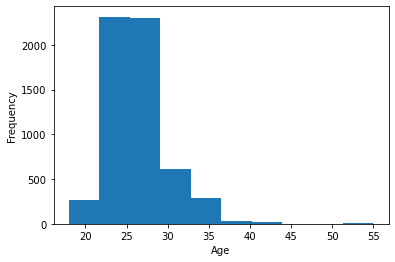

In [22]:
# age distribution of participants
age = data[np.isfinite(data['age'])]['age']
plt.hist(age.values)
plt.xlabel('Age')
plt.ylabel('Frequency')
#graph we can say most of the participants were in their mid 20's to early 30's



<AxesSubplot:title={'center':'Correlation Heatmap'}>

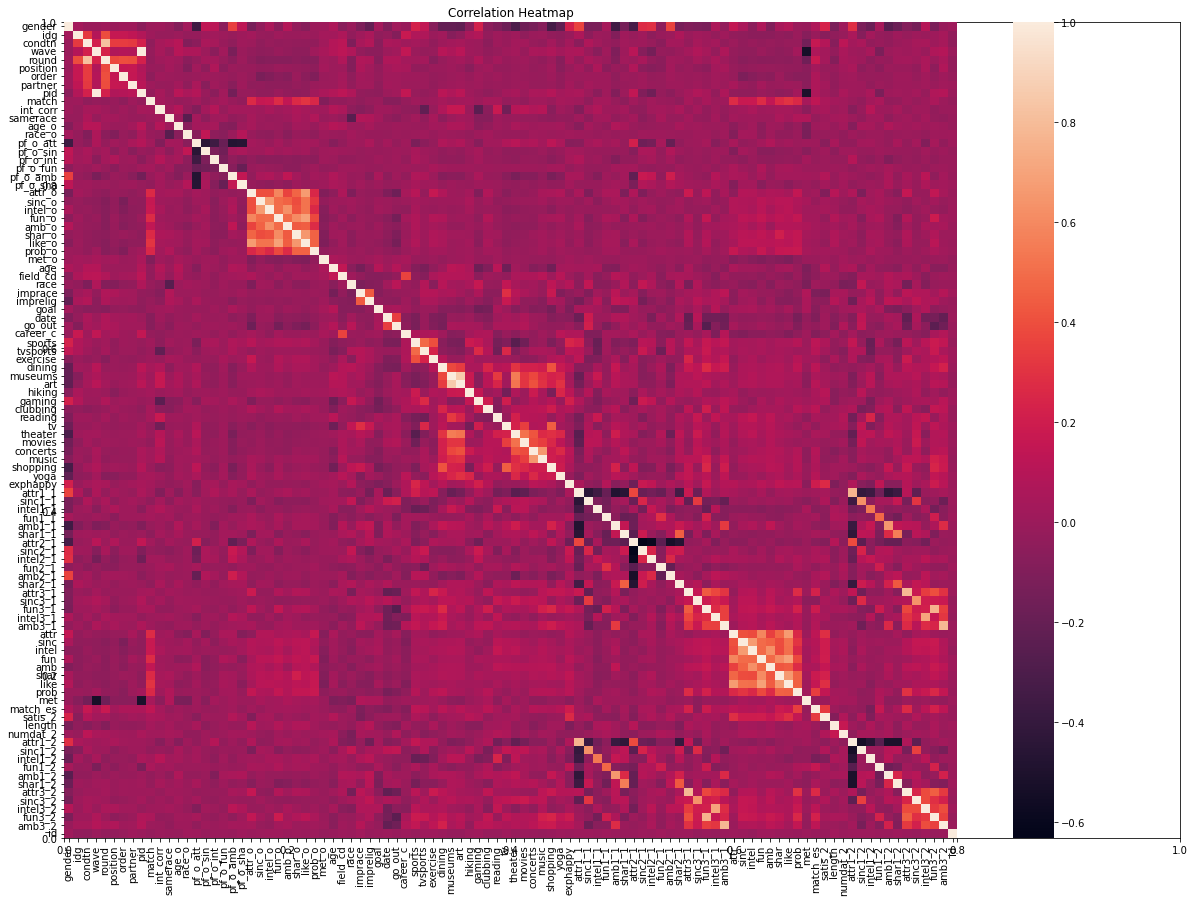

In [23]:
plt.subplots(figsize=(20,15))
ax=plt.axes()
ax.set_title('Correlation Heatmap')
corr=data.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)


Shape of Df -match: (988, 102)
Shape of df of no match: (4921, 102)
Shape of upsampled df of match: (4921, 102)
1    4921
0    4921
Name: match, dtype: int64


<AxesSubplot:ylabel='Type'>

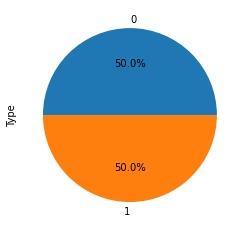

In [25]:
match = data[data["match"] == 1] # df of match =1
no_match  = data[data["match"] == 0]# df of match=0(ie, nomatch)
print('Shape of Df -match:', match.shape) # shape of df of match
print('Shape of df of no match:',no_match.shape) # shape of df of no_match


# to upsample the data frame of match to length of no_match df
from sklearn.utils import resample
match_upsample = resample(match,
             replace=True,
             n_samples=len(no_match),
             random_state=42)

print('Shape of upsampled df of match:',match_upsample.shape)


data_upsampled = pd.concat([match_upsample, no_match]) # new df of usampled data

print(data_upsampled["match"].value_counts()) # count of match and no_match

data_upsampled.groupby('match').size().plot(kind='pie', #pie chart visualisation
                                       y = "match",
                                       label = "Type",
                                       autopct='%1.1f%%')


In [27]:
x = data_upsampled.drop(['match','id',
    'pid',
    'wave',
    'position',
    'order'], axis=1) # Drop irrelevant features which contain no information about the target variable

features_numeric = list(x.select_dtypes(include=['float64']))# list of numerical features


features_categorical = list(x.select_dtypes(include=['object']))
print('Categorical features:',features_categorical)
y = data_upsampled['match'] # target column


Categorical features: ['field', 'from', 'zipcode', 'career']


In [28]:
np.random.seed(0)
#le = LabelEncoder()
# Pipeline of steps to be followed in preprocessing of numeric features
transformer_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('scaler', MinMaxScaler())]
)

# Pipeline of tranforming categorical features,this imputer imputes with an arbitrary value and then use hotencoders to tranform categoric to numeric
transformer_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent',fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)


# then we put the features list and the transformers together
# using the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric),
        ('cat', transformer_categorical,features_categorical)
    ]
)

In [29]:
# full pipeline of the steps
# The loss function used for predicting probabilities for binary classification problems is “binary:logistic” 
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', XGBClassifier(
            objective='binary:logistic', seed=1))
    ]
)
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'my_classifier__n_estimators': [10, 20, 100],
    'my_classifier__max_depth':[10, 20],
    'my_classifier__learning_rate':[0.01,0.1]
}

grid_search = GridSearchCV(
    full_pipline, param_grid, cv=5, verbose=3, n_jobs=-1, 
    scoring='roc_auc')

grid_search.fit(x,y)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
best score 0.9953280088615237
best score {'my_classifier__learning_rate': 0.1, 'my_classifier__max_depth': 20, 'my_classifier__n_estimators': 100, 'preprocessor__num__imputer__strategy': 'median'}


## Random Search

In [30]:
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', RandomForestClassifier())
    ]
)

param_grid = {
    
    'my_classifier__n_estimators': [100, 200, 300,500],
    'my_classifier__criterion':['gini','entropy'],
    'my_classifier__max_depth':[2, 3]
}
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    full_pipline, param_grid,n_iter=3, cv=5, verbose=3, n_jobs=2, 
    scoring='roc_auc')

random_search.fit(x, y)

print('best score {}'.format(random_search.best_score_))
print('best score {}'.format(random_search.best_params_))

[CV 5/5] END my_classifier__learning_rate=0.01, my_classifier__max_depth=10, my_classifier__n_estimators=10, preprocessor__num__imputer__strategy=mean;, score=0.939 total time=   2.1s
[CV 3/5] END my_classifier__learning_rate=0.01, my_classifier__max_depth=10, my_classifier__n_estimators=20, preprocessor__num__imputer__strategy=mean;, score=0.933 total time=   4.6s
[CV 1/5] END my_classifier__learning_rate=0.01, my_classifier__max_depth=10, my_classifier__n_estimators=100, preprocessor__num__imputer__strategy=mean;, score=0.967 total time=  16.9s
[CV 2/5] END my_classifier__learning_rate=0.01, my_classifier__max_depth=20, my_classifier__n_estimators=10, preprocessor__num__imputer__strategy=mean;, score=0.952 total time=   3.2s
[CV 2/5] END my_classifier__learning_rate=0.01, my_classifier__max_depth=20, my_classifier__n_estimators=10, preprocessor__num__imputer__strategy=median;, score=0.955 total time=   3.6s
[CV 3/5] END my_classifier__learning_rate=0.01, my_classifier__max_depth=20, 

## Bayesian Search

In [31]:
SVC_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_svc', SVC(class_weight='balanced'))
    ]
)
# SVC has a class_weight attribute for unbalanced data

# define ranges for bayes search
bayes_search = BayesSearchCV(
    SVC_pipline,
    {
        'my_svc__C': Real(1e-6, 1e+6, prior='log-uniform'),
        'my_svc__gamma': Real(1e-6, 1e+1, prior='log-uniform'),
        'my_svc__degree': Integer(1,8),
        'my_svc__kernel': Categorical(['linear', 'poly', 'rbf']),
    },
    n_iter=3,
    random_state=0,
    verbose=1,
)

bayes_search.fit(x, y)
print('best score {}'.format(bayes_search.best_score_))
print('best score {}'.format(bayes_search.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
best score 0.9439137938865422
best score OrderedDict([('my_svc__C', 0.0012602593949011189), ('my_svc__degree', 8), ('my_svc__gamma', 2.285959941576884), ('my_svc__kernel', 'poly')])
[CV 2/5] END my_classifier__criterion=gini, my_classifier__max_depth=2, my_classifier__n_estimators=200;, score=0.851 total time=   0.6s
[CV 3/5] END my_classifier__criterion=gini, my_classifier__max_depth=2, my_classifier__n_estimators=200;, score=0.856 total time=   0.5s
[CV 5/5] END my_classifier__criterion=gini, my_classifier__max_depth=2, my_classifier__n_estimators=200;, score=0.852 total time=   0.5s
[CV 2/5] END my_classifier__criterion=gini, my_classifier__max_depth=3, my_classifier__n_estimators=300;, score=0.856 total time=   1.0s
[CV 4/5] END my_classifier__criterion=gini, my_classifier__max_depth=3, my_classifier__n_esti

### Observations

The upsampling have improved the performance of the model.

The accuracy of the XGBClassifier:
    best score 0.995
    {'my_classifier__max_depth': 20, 'my_classifier__n_estimators': 100,imputer_strategy:mean}
For randomforest classifier,best score:0.85
{'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__n_estimators': 300, 'my_classifier__max_depth': 3, 'my_classifier__criterion': 'gini'}

SVC-Bayesian Search-0.94